# Titanic Dataset


## Dataset Description

### Overview

The data has been split into two groups:
- training set (`train.csv`)
- test set (`test.csv`)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers, gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.



### Data Dictionary

| Variable  | Definition                              | Key                             |
| --------- | -------------------------------------- | ------------------------------- |
| `survival`  | Survival                               | 0 = No, 1 = Yes                 |
| `pclass`    | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd      |
| `sex`       | Sex                                    |                                 |
| `Age`       | Age in years                           |                                 |
| `sibsp`     | # of siblings / spouses aboard the Titanic |                              |
| `parch`     | # of parents / children aboard the Titanic |                              |
| `ticket`    | Ticket number                          |                                 |
| `fare`      | Passenger fare                         |                                 |
| `cabin`     | Cabin number                           |                                 |
| `embarked`  | Port of Embarkation                    | S = Southampton (UK), C = Cherbourg (France), Q = Queenstown (Ireland)  |


Embarkation ordered and in direction the USA.

### Variable Notes
- `pclass`: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- `age`: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5
- `sibsp`: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
- `parch`: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson



### Some help for the EDA :

https://www.kaggle.com/code/allohvk/titanic-missing-age-imputation-tutorial-advanced/notebook

https://www.kaggle.com/code/allohvk/titanic-advanced-eda?scriptVersionId=77739368

https://github.com/Kaggle/kaggle-api

## Imports and configuration

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

!kaggle config set -n competition -v titanic

- competition is now set to: titanic


In [13]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")
combined_dataset = titanic_train.append(titanic_test)

titanic_train.head()


/var/folders/9x/s90jm6jn1x93s91bfj05k9_c0000gn/T/ipykernel_44037/224891919.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  combined_dataset = titanic_train.append(titanic_test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


When trying to visualize datas, make assumption with respect to the survivibility of passengers, use the titanic train dataset. We don't want to make some leakeage from the test to the traind dataset. Then, when post-processing techniques / filling missing values, you can applied your findings from the train dataset to the test dataset (`combined_dataset`).

## Dataset Visualization

### Types

In [14]:
titanic_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
titanic_train.Name.apply(lambda x: type(x).__name__).value_counts()


str    891
Name: Name, dtype: int64

Every `object` are strings. If not, it means that they are `NaN` values.
No type issues for this dataset.

### Missing values

In [16]:
print(titanic_train.isnull().sum())
print(titanic_test.isnull().sum())


PassengerId      0

Survived         0

Pclass           0

Name             0

Sex              0

Age            177

SibSp            0

Parch            0

Ticket           0

Fare             0

Cabin          687

Embarked         2

dtype: int64

PassengerId      0

Pclass           0

Name             0

Sex              0

Age             86

SibSp            0

Parch            0

Ticket           0

Fare             1

Cabin          327

Embarked         0

dtype: int64


### Duplicates

In [17]:
titanic_train.duplicated(["PassengerId"]).sum() + titanic_train.duplicated(["Name"]).sum()


0

### Summary statistics / Univariate analysis

In [18]:
print(titanic_train.Survived.value_counts())
print()
print(titanic_train.Pclass.value_counts())
print()
print(titanic_train.Embarked.value_counts())


0    549

1    342

Name: Survived, dtype: int64



3    491

1    216

2    184

Name: Pclass, dtype: int64



S    644

C    168

Q     77

Name: Embarked, dtype: int64


In [19]:
print(titanic_train.SibSp.value_counts())
print()
print(titanic_train.Parch.value_counts())

0    608

1    209

2     28

4     18

3     16

8      7

5      5

Name: SibSp, dtype: int64



0    678

1    118

2     80

5      5

3      5

4      4

6      1

Name: Parch, dtype: int64


In [20]:
titanic_train.loc[:, ["SibSp", "Parch", "Age", "Fare"]].describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


### Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

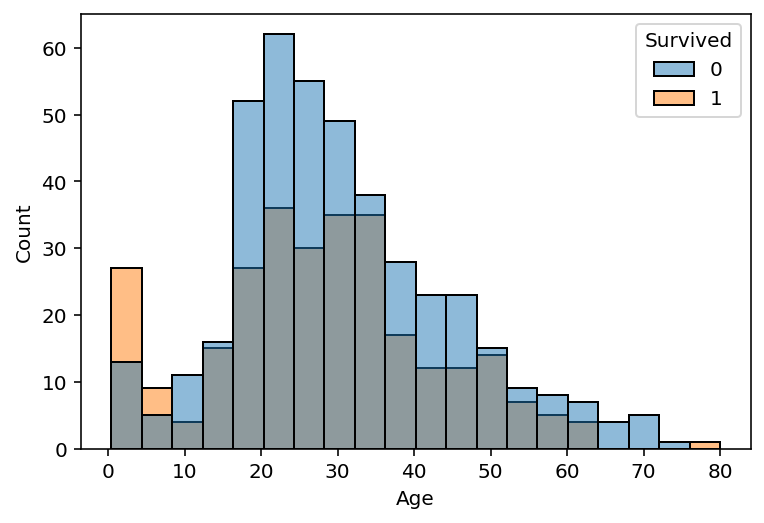

In [21]:
sns.histplot(titanic_train, x="Age", hue="Survived")


<AxesSubplot:xlabel='Sex', ylabel='Count'>

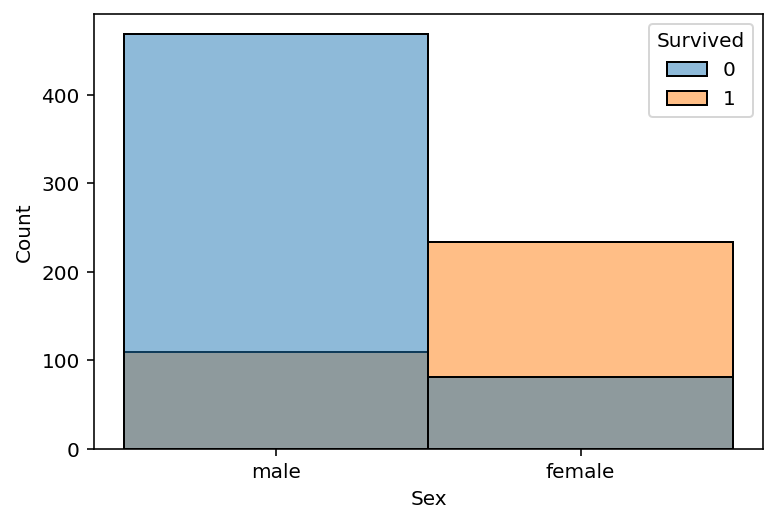

In [22]:
sns.histplot(titanic_train, x="Sex", hue="Survived")


<AxesSubplot:xlabel='Fare', ylabel='Count'>

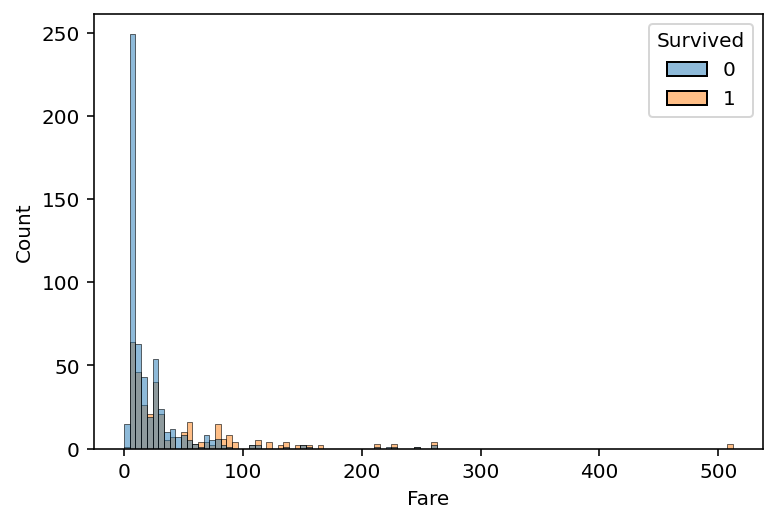

In [23]:
sns.histplot(titanic_train, x="Fare", hue="Survived")

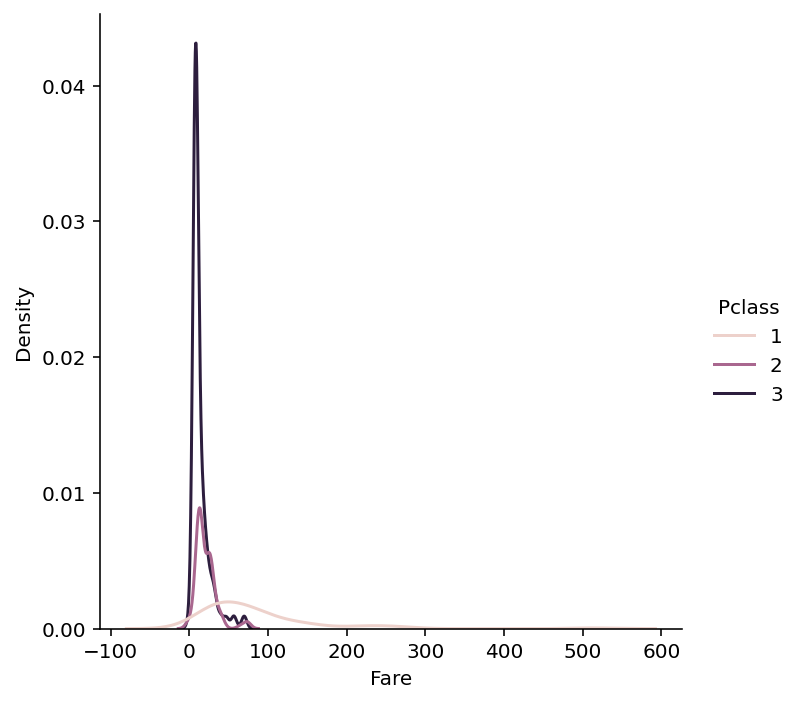

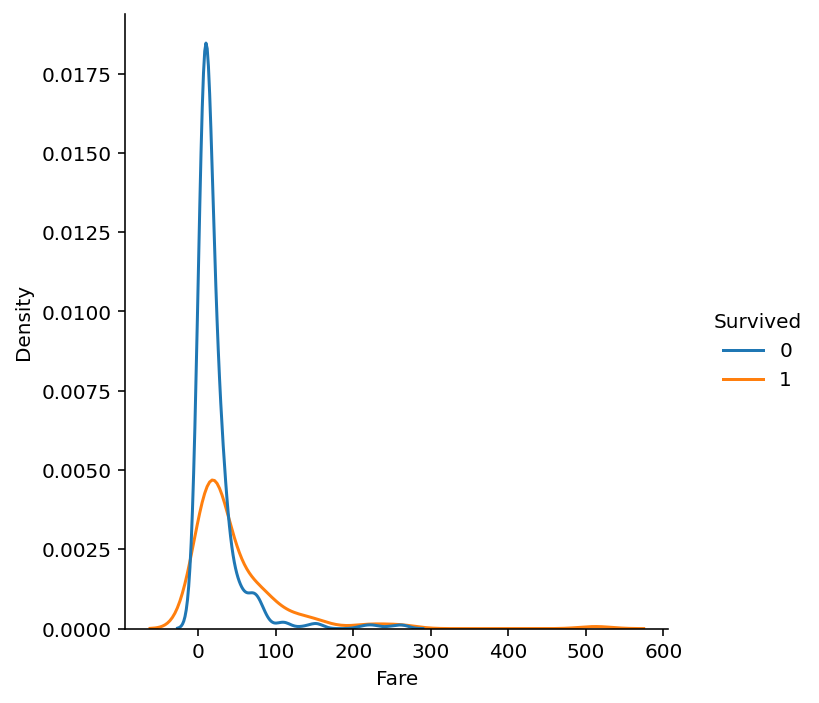

In [24]:
sns.displot(data=titanic_train, x="Fare", hue="Pclass", kind="kde")
sns.displot(data=titanic_train, x="Fare", hue="Survived", kind="kde")


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

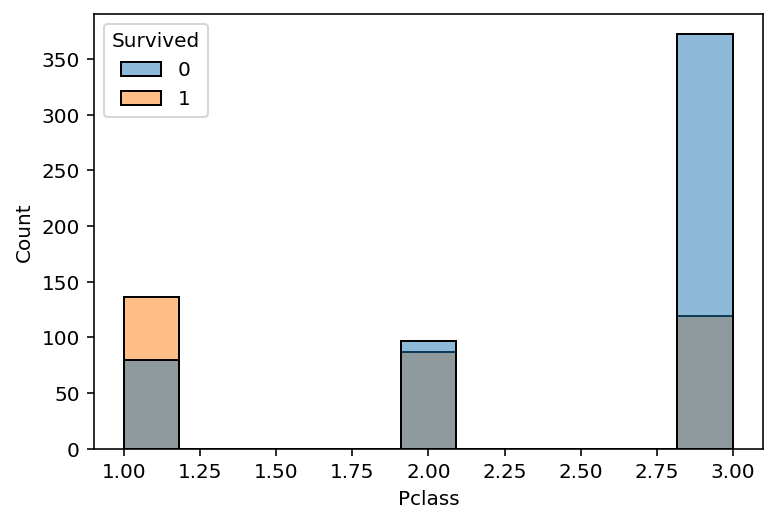

In [25]:
sns.histplot(titanic_train, x="Pclass", hue="Survived")


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

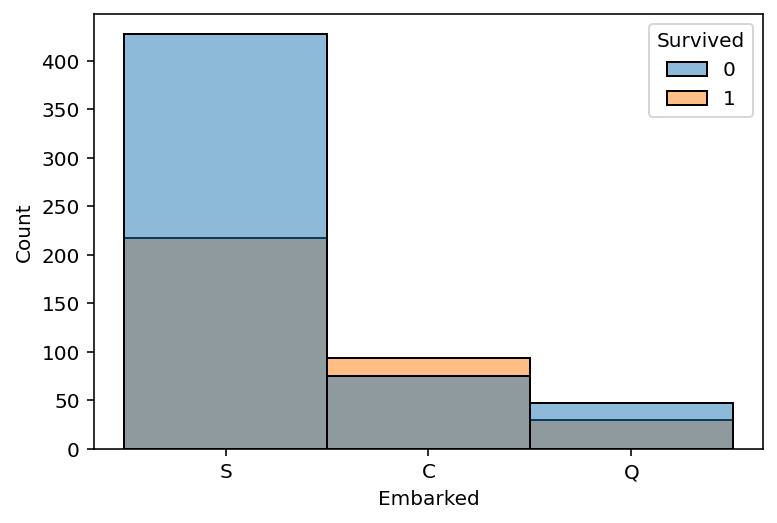

In [26]:
sns.histplot(titanic_train, x="Embarked", hue="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

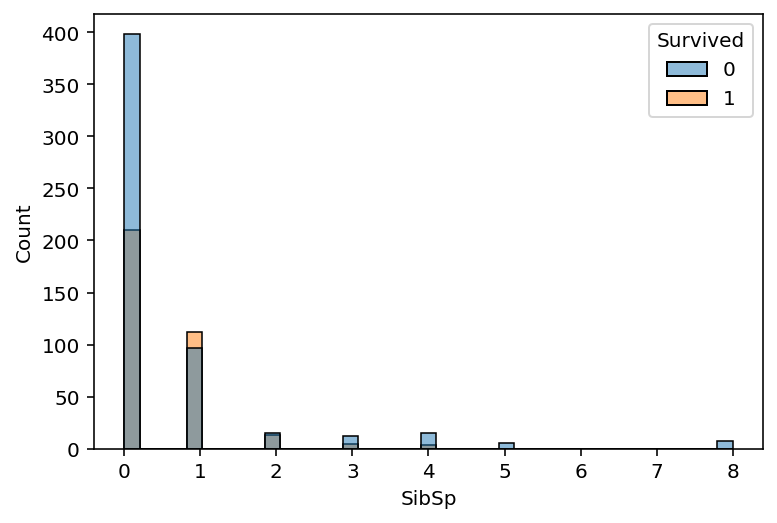

In [27]:
sns.histplot(titanic_train, x="SibSp", hue="Survived")


<AxesSubplot:xlabel='Parch', ylabel='Count'>

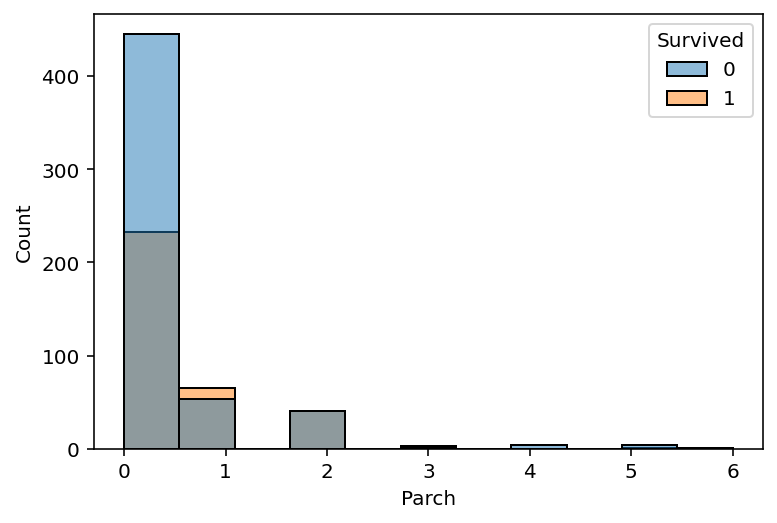

In [28]:
sns.histplot(titanic_train, x="Parch", hue="Survived")

## Extract features

### Family Names & Titles

In [29]:
titanic_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
titanic_train["Last_name"] = titanic_train.Name.apply(lambda x: str.split(x, ",")[0])
titanic_test["Last_name"] = titanic_test.Name.apply(lambda x: str.split(x, ",")[0])

In [31]:
titanic_train.Name.apply(lambda x: ((str.split(x, ",")[1]).split(".")[0])).value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

In [32]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royal",
    "Don": "Royal",
    "Sir": "Royal",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royal",
    "Dona": "Royal",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royal",
}

In [33]:
titanic_train["Title"] = titanic_train.Name.apply(
    lambda x: Title_Dictionary[((str.split(x, ",")[1]).split(".")[0]).strip()]
)

titanic_test["Title"] = titanic_test.Name.apply(
    lambda x: Title_Dictionary[((str.split(x, ",")[1]).split(".")[0]).strip()]
)

titanic_train.Title.value_counts()


Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

In [34]:
round(titanic_train.groupby(["Title"]).Survived.mean(), 3)


Title
Master     0.575
Miss       0.701
Mr         0.157
Mrs        0.795
Officer    0.278
Royal      0.600
Name: Survived, dtype: float64

The `Title` is highly correlated to your chances to survive.

### Fare per person

#### PeopleInTicket

In [35]:
titanic_train["PeopleInTicket"] = titanic_train["Ticket"].map(
    combined_dataset["Ticket"].value_counts()
)

titanic_test["PeopleInTicket"] = titanic_test["Ticket"].map(
    combined_dataset["Ticket"].value_counts()
)



#### Fare Outliers / missing values

In [36]:
titanic_train[(titanic_train["Fare"] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name,Title,PeopleInTicket
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard,Mr,4
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison,Mr,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist,Mr,4
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Parkes,Mr,3
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson,Mr,4
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Cunningham,Mr,3
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Campbell,Mr,3
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Frost,Mr,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson,Mr,4
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Parr,Mr,1


How can their fare be 0. All of them are middle aged males. All have embarked at one place. Most likely this is the Cabin crew. This can be considered as an outlier and must be solved.

In [37]:
round(
    titanic_train.loc[:, ["Pclass", "Embarked", "PeopleInTicket", "Fare"]]
    .groupby(["Pclass", "Embarked", "PeopleInTicket"])
    .agg(("count", "min", "mean", "max")),
    2,
)


Fare                        
                               count     min    mean     max
Pclass Embarked PeopleInTicket                              
1      C        1                 23   26.55   33.65   49.50
                2                 27   31.00   71.18   91.08
                3                 17   76.73  119.90  247.52
                4                  9  110.88  250.20  512.33
                5                  7  134.50  198.66  227.52
                7                  2  262.38  262.38  262.38
       Q        3                  2   90.00   90.00   90.00
       S        1                 49    0.00   26.83   50.50
                2                 42    0.00   60.55  133.65
                3                 15   77.96   95.48  153.46
                4                 13   93.50  152.94  221.78
                6                  8  151.55  207.28  263.00
2      C        1                  7   12.00   13.78   15.05
                2                  5   24.00   27.17   30.07
                3                  2   37.00   37.00   37.00
                4                  3   41.58   41.58   41.58
       Q        1                  3   12.35   12.35   12.35
       S        1                 79    0.00   11.82   16.00
                2                 45   10.50   22.97   30.00
                3                 26    0.00   24.39   39.00
                4                  7   27.75   33.54   39.00
                5                  2   65.00   65.00   65.00
                7                  5   73.50   73.50   73.50
3      C        1                 36    4.01    7.29    8.71
                2                 16    8.52   14.16   18.79
                3                 10   15.25   17.41   22.36
                4                  4   19.26   19.26   19.26
       Q        1                 54    6.75    7.72    8.46
                2                  8   15.50   15.50   15.50
                3                  5   23.25   23.79   24.15
                6                  5   29.12   29.12   29.12
       S        1                230    6.24    8.11   19.97
                2                 36    9.22   14.71   18.00
                3                 24   11.13   18.74   24.15
                4                  8    0.00   11.01   23.45
                5                 12   21.08   26.97   34.38
                6                  6   27.90   27.90   27.90
                7                 17   31.28   34.27   39.69
                8                 13   46.90   52.07   56.50
                11                 7   69.55   69.55   69.55

In [38]:
# Calculate the mean ages from the train set
mean_fares = titanic_train.groupby(["Pclass", "Embarked", "PeopleInTicket"])["Fare"].mean()


# Define a function to fill the missing values
def fill_fare(row):
    if row["Fare"] == 0 or pd.isna(row["Fare"]):
        return mean_fares[row["Pclass"], row["Embarked"], row["PeopleInTicket"]]
    else:
        return row["Fare"]


# Use the function to fill the missing values in the train set
titanic_train["Fare"] = titanic_train.apply(fill_fare, axis=1)

# # Use the function to fill the missing values in the test set
titanic_test["Fare"] = titanic_test.apply(fill_fare, axis=1)

#### Family size

In [39]:
(titanic_train.Last_name).value_counts().value_counts()


1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: Last_name, dtype: int64

In [40]:
titanic_train["FamilySize"] = titanic_train.SibSp + titanic_train.Parch + 1
titanic_test["FamilySize"] = titanic_test.SibSp + titanic_test.Parch + 1
titanic_train["FamilySize"].value_counts()


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

#### PeopleInGroup

(0.0, 100.0)

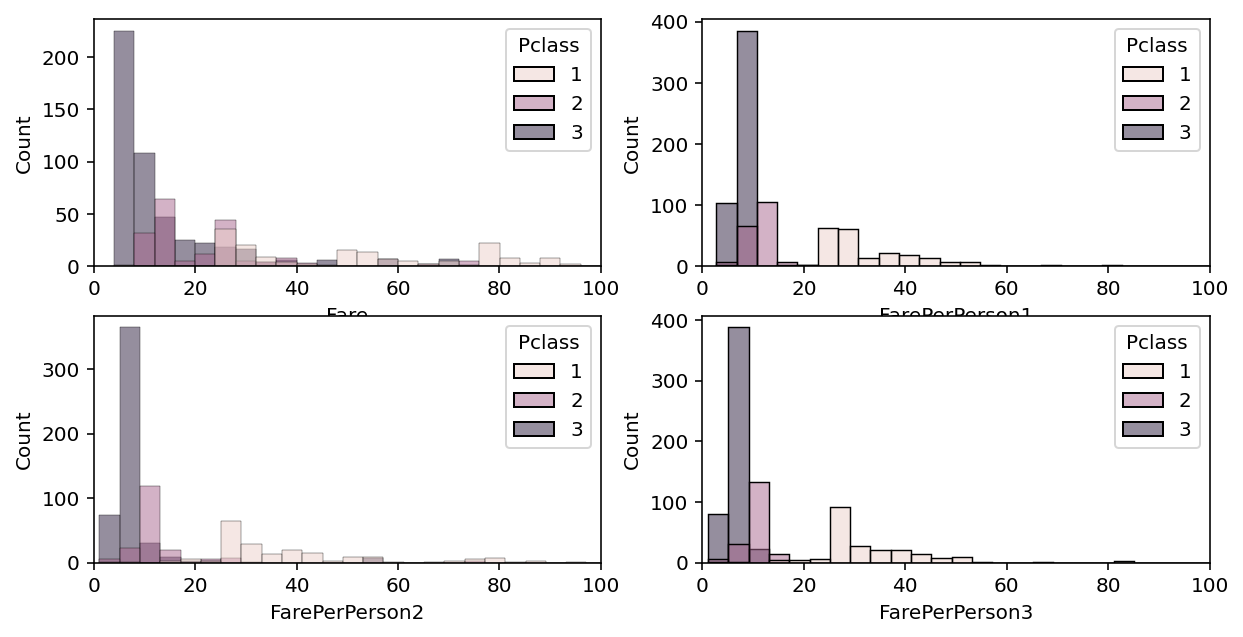

In [41]:
test = titanic_train.loc[
    :, ["Survived", "Pclass", "Fare", "FamilySize", "Embarked", "PeopleInTicket"]
]
test["PeopleInGroup"] = test[["FamilySize", "PeopleInTicket"]].max(axis=1)

# test = test.loc[test.Embarked == "S"]
# test = test.loc[test.Embarked == "C"]
# test = test.loc[test.Embarked == "Q"]

test["FarePerPerson1"] = test["Fare"] / test["PeopleInTicket"]
test["FarePerPerson2"] = test["Fare"] / test["FamilySize"]
test["FarePerPerson3"] = test["Fare"] / test["PeopleInGroup"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(test, x="Fare", hue="Pclass", binwidth=4, ax=ax1)
ax1.set_xlim(0, 100)

sns.histplot(test, x="FarePerPerson1", hue="Pclass", binwidth=4, ax=ax2)
ax2.set_xlim(0, 100)

sns.histplot(test, x="FarePerPerson2", hue="Pclass", binwidth=4, ax=ax3)
ax3.set_xlim(0, 100)

sns.histplot(test, x="FarePerPerson3", hue="Pclass", binwidth=4, ax=ax4)
ax4.set_xlim(0, 100)

They are multiple possibilities to determine the new `Fare_per_person` from the `Fare` column.
1. From the number of people on the same ticket `PeopleInTicket`
2. From the number of people on the same ticket `FamilySize`
3. From a mix of both columns `max(PeopleInTicket, FamilySize)`.

From varying the `Embarked` parameter (because price of the tickets from the same Embarkation point should be closer), we can see that any of the methods is still more preferable that the others. However, values are more stacked with the second option (`PeopleInTicket`). People from the same family are not forced to buy it at the same time.


In [42]:
round(
    test.loc[
        :, ["Pclass", "Embarked", "Fare", "FarePerPerson1", "FarePerPerson2", "FarePerPerson3"]
    ]
    .groupby(["Embarked", "Pclass"])
    .agg(("count", "mean", "std")),
    2,
)

Fare                FarePerPerson1                \
                count    mean    std          count   mean    std   
Embarked Pclass                                                     
C        1         85  104.72  99.09             85  39.18  19.89   
         2         17   25.36  11.35             17  12.96   1.65   
         3         66   11.21   4.87             66   6.86   1.15   
Q        1          2   90.00   0.00              2  30.00   0.00   
         2          3   12.35   0.00              3  12.35   0.00   
         3         72   11.18   6.72             72   7.54   0.78   
S        1        127   71.69  57.63            127  31.30   9.39   
         2        164   20.99  13.11            164  11.33   2.14   
         3        353   14.77  13.19            353   7.41   1.67   

                FarePerPerson2               FarePerPerson3                
                         count   mean    std          count   mean    std  
Embarked Pclass                                                            
C        1                  85  71.08  84.76             85  38.23  20.30  
         2                  17  12.55   2.19             17  12.55   2.19  
         3                  66   7.22   2.79             66   6.72   1.38  
Q        1                   2  37.50  10.61              2  30.00   0.00  
         2                   3  12.35   0.00              3  12.35   0.00  
         3                  72   7.78   2.57             72   7.34   1.12  
S        1                 127  41.93  33.09            127  30.59   9.36  
         2                 164  13.38   8.27            164  10.97   2.55  
         3                 353   8.45   7.22            353   7.08   1.64

From this final table, we see that using the `FarePerPerson1` option will reduce the most the variance. The option `FarePerPerson3` is still safe tho.

In [43]:
titanic_train["FarePerPerson"] = titanic_train["Fare"] / titanic_train["PeopleInTicket"]

titanic_test["FarePerPerson"] = titanic_test["Fare"] / titanic_test["PeopleInTicket"]

### Cabin deck letter

In [44]:
titanic_train["Cabin_deck"] = titanic_train.Cabin.apply(lambda x: x[0] if type(x) == str else x)
titanic_test["Cabin_deck"] = titanic_test.Cabin.apply(lambda x: x[0] if type(x) == str else x)
titanic_train["Cabin_deck"].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_deck, dtype: int64

In [45]:
table_count = titanic_train.loc[:, ["Ticket", "Cabin", "PeopleInTicket"]].groupby("Ticket").count()
table_count.loc[(table_count["Cabin"] > 0) & (table_count["PeopleInTicket"] > table_count["Cabin"])]


,Cabin,PeopleInTicket
Ticket,,
113781,3,4
17421,3,4
19877,1,2
2668,1,2
36928,1,2
PC 17755,2,3
PC 17757,2,4
PC 17760,2,3
PC 17761,1,2


In [46]:
titanic_train[titanic_train.Ticket == "PC 17757"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name,Title,PeopleInTicket,FamilySize,FarePerPerson,Cabin_deck
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,Bidois,Miss,5,1,45.505,NaN
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C,Robbins,Mr,5,1,45.505,NaN
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,Astor,Mrs,5,2,45.505,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,Endres,Miss,5,1,45.505,C


It will be too complicated to try to fill the blanks of the `Cabin` column. In addition, the information of the Cabin letter would have been useful to determine a potential position on the boat (which is even more complicated to implement). Thus, we will drop this column later and not use it. 

## Complete data

### Cabin

No reason to fill it if we will frop the column.

### Embarked

In [47]:
titanic_train[titanic_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name,Title,PeopleInTicket,FamilySize,FarePerPerson,Cabin_deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,2,1,40.0,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,2,1,40.0,B


In [48]:
titanic_train[(titanic_train.Pclass == 1)].groupby("Embarked").agg(
    {"FarePerPerson": "mean", "Fare": "mean", "PassengerId": "count"}
)
titanic_train.Embarked.fillna("C", inplace=True)


### Age

Filling the age is important to determine the autonomy of the person. The mean `Age` on the boat is 30. If we assign the same age to a child, we will probably not have the result.

Use transform when you want to maintain the same shape as the original DataFrame, but replace values based on group-based calculations. Use agg when you want to obtain a summary of each group.

In [49]:
titanic_train["Age"].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
round(
    titanic_train.loc[:, ["Pclass", "Embarked", "Age", "Title", "Sex", "SibSp", "Parch"]]
    .groupby(["Embarked", "Pclass", "Title"])
    .agg(("count", "min", "mean", "max")),
    2,
)


/var/folders/9x/s90jm6jn1x93s91bfj05k9_c0000gn/T/ipykernel_44037/3308449575.py:4: FutureWarning: ['Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.

  .agg(("count", "min", "mean", "max")),


Age                     SibSp               Parch  \
                        count    min   mean   max count min  mean max count   
Embarked Pclass Title                                                         
C        1      Miss       23  16.00  32.87  58.0    24   0  0.33   2    24   
                Mr         32  17.00  39.59  71.0    37   0  0.24   1    37   
                Mrs        16  17.00  41.62  62.0    20   0  0.65   1    20   
                Officer     2  32.00  44.00  56.0     3   0  0.00   0     3   
                Royal       3  40.00  45.67  49.0     3   0  0.67   1     3   
         2      Master      1   1.00   1.00   1.0     1   0  0.00   0     1   
                Miss        3   3.00  15.67  27.0     3   0  0.67   1     3   
                Mr          7  23.00  29.50  36.0     9   0  0.56   1     9   
                Mrs         4  14.00  21.75  28.0     4   0  0.75   1     4   
         3      Master      2   0.42   6.21  12.0     4   0  0.75   1     4   
                Miss       12   0.75   9.33  18.0    14   0  0.79   2    14   
                Mr         23  11.00  26.65  45.5    39   0  0.18   2    39   
                Mrs         4  15.00  28.25  45.0     9   0  0.22   1     9   
Q        1      Miss        1  33.00  33.00  33.0     1   1  1.00   1     1   
                Officer     1  44.00  44.00  44.0     1   2  2.00   2     1   
         2      Miss        1  30.00  30.00  30.0     2   0  0.00   0     2   
                Officer     1  57.00  57.00  57.0     1   0  0.00   0     1   
         3      Master      4   2.00   5.25   8.0     4   4  4.00   4     4   
                Miss        8  15.00  19.69  30.5    30   0  0.17   2    30   
                Mr         10  19.00  37.30  70.5    35   0  0.20   2    35   
                Mrs         2  32.00  35.50  39.0     3   0  0.67   1     3   
S        1      Master      3   0.92   5.31  11.0     3   0  0.67   1     3   
                Miss       23   2.00  26.48  63.0    23   0  0.39   3    23   
                Mr         55  19.00  42.74  80.0    70   0  0.30   3    70   
                Mrs        19  17.00  39.37  58.0    23   0  0.87   2    23   
                Officer     6  45.00  54.33  70.0     6   0  0.50   2     6   
                Royal       2  33.00  35.50  38.0     2   0  0.00   0     2   
         2      Master      8   0.67   2.42   8.0     8   0  1.00   2     8   
                Miss       28   2.00  22.84  50.0    29   0  0.24   2    29   
                Mr         75  16.00  33.07  70.0    82   0  0.28   2    82   
                Mrs        38  19.00  34.79  57.0    38   0  0.66   3    38   
                Officer     7  23.00  39.86  54.0     7   0  0.14   1     7   
         3      Master     18   1.00   5.28  11.0    20   0  3.15   8    20   
                Miss       49   1.00  17.20  45.0    58   0  1.50   8    58   
                Mr        196  14.00  28.53  74.0   245   0  0.31   8   245   
                Mrs        27  18.00  34.15  63.0    30   0  0.73   3    30   

                                       
                        min  mean max  
Embarked Pclass Title                  
C        1      Miss      0  0.33   2  
                Mr        0  0.38   2  
                Mrs       0  0.25   1  
                Officer   0  0.00   0  
                Royal     0  0.00   0  
         2      Master    2  2.00   2  
                Miss      0  0.67   2  
                Mr        0  0.33   2  
                Mrs       0  0.50   2  
         3      Master    0  0.75   1  
                Miss      0  0.64   2  
                Mr        0  0.08   1  
                Mrs       0  1.11   3  
Q        1      Miss      0  0.00   0  
                Officer   0  0.00   0  
         2      Miss      0  0.00   0  
                Officer   0  0.00   0  
         3      Master    1  1.00   1  
                Miss      0  0.07   2  
                Mr        0  0.03   1  
                Mrs     

In [51]:
round(
    titanic_train.loc[:, ["Pclass", "Embarked", "Age", "Title", "Sex"]]
    .groupby(["Embarked", "Pclass", "Title", "Sex"])
    .agg(("count", "min", "mean", "max")),
    2,
)

Age                    
                               count    min   mean   max
Embarked Pclass Title   Sex                             
C        1      Miss    female    23  16.00  32.87  58.0
                Mr      male      32  17.00  39.59  71.0
                Mrs     female    16  17.00  41.62  62.0
                Officer male       2  32.00  44.00  56.0
                Royal   female     1  48.00  48.00  48.0
                        male       2  40.00  44.50  49.0
         2      Master  male       1   1.00   1.00   1.0
                Miss    female     3   3.00  15.67  27.0
                Mr      male       7  23.00  29.50  36.0
                Mrs     female     4  14.00  21.75  28.0
         3      Master  male       2   0.42   6.21  12.0
                Miss    female    12   0.75   9.33  18.0
                Mr      male      23  11.00  26.65  45.5
                Mrs     female     4  15.00  28.25  45.0
Q        1      Miss    female     1  33.00  33.00  33.0
                Officer male       1  44.00  44.00  44.0
         2      Miss    female     1  30.00  30.00  30.0
                Officer male       1  57.00  57.00  57.0
         3      Master  male       4   2.00   5.25   8.0
                Miss    female     8  15.00  19.69  30.5
                Mr      male      10  19.00  37.30  70.5
                Mrs     female     2  32.00  35.50  39.0
S        1      Master  male       3   0.92   5.31  11.0
                Miss    female    23   2.00  26.48  63.0
                Mr      male      55  19.00  42.74  80.0
                Mrs     female    19  17.00  39.37  58.0
                Officer female     1  49.00  49.00  49.0
                        male       5  45.00  55.40  70.0
                Royal   female     1  33.00  33.00  33.0
                        male       1  38.00  38.00  38.0
         2      Master  male       8   0.67   2.42   8.0
                Miss    female    28   2.00  22.84  50.0
                Mr      male      75  16.00  33.07  70.0
                Mrs     female    38  19.00  34.79  57.0
                Officer male       7  23.00  39.86  54.0
         3      Master  male      18   1.00   5.28  11.0
                Miss    female    49   1.00  17.20  45.0
                Mr      male     196  14.00  28.53  74.0
                Mrs     female    27  18.00  34.15  63.0

In [52]:
round(
    titanic_train.loc[:, ["Pclass", "Embarked", "Age", "Title", "Sex"]]
    .groupby(["Pclass", "Title", "Sex"])
    .agg(("count", "min", "mean", "max")),
    2,
)


/var/folders/9x/s90jm6jn1x93s91bfj05k9_c0000gn/T/ipykernel_44037/3865919825.py:4: FutureWarning: ['Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.

  .agg(("count", "min", "mean", "max")),


Age                    
                      count    min   mean   max
Pclass Title   Sex                             
1      Master  male       3   0.92   5.31  11.0
       Miss    female    47   2.00  29.74  63.0
       Mr      male      87  17.00  41.58  80.0
       Mrs     female    35  17.00  40.40  62.0
       Officer female     1  49.00  49.00  49.0
               male       8  32.00  51.12  70.0
       Royal   female     2  33.00  40.50  48.0
               male       3  38.00  42.33  49.0
2      Master  male       9   0.67   2.26   8.0
       Miss    female    32   2.00  22.39  50.0
       Mr      male      82  16.00  32.77  70.0
       Mrs     female    42  14.00  33.55  57.0
       Officer male       8  23.00  42.00  57.0
3      Master  male      24   0.42   5.35  12.0
       Miss    female    69   0.75  16.12  45.0
       Mr      male     229  11.00  28.72  74.0
       Mrs     female    33  15.00  33.52  63.0

In [53]:
# Calculate the mean ages from the train set
mean_ages = titanic_train.groupby(["Pclass", "Sex", "Title"])["Age"].mean()


# Define a function to fill the missing values
def fill_age(row):
    if pd.isnull(row["Age"]):
        return mean_ages[row["Pclass"], row["Sex"], row["Title"]]
    else:
        return row["Age"]


# Use the function to fill the missing values in the train set
titanic_train["Age"] = titanic_train.apply(fill_age, axis=1)

# Use the function to fill the missing values in the test set
titanic_test["Age"] = titanic_test.apply(fill_age, axis=1)


## Select features

After having verified we have done as much work as we can to clean, fill missing values, to detect outliers and to create new features, it is high time to select features for the prediction model and to adjust the format of certains features (categorical feature, cyclic features, etc ...).

In [54]:
titanic_train = titanic_train.loc[
    :,
    [
        "Survived",
        "Pclass",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Embarked",
        "Title",
        "FamilySize",
        "PeopleInTicket",
        "FarePerPerson",
    ],
]

titanic_test = titanic_test.loc[
    :,
    [
        "Pclass",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Embarked",
        "Title",
        "FamilySize",
        "PeopleInTicket",
        "FarePerPerson",
    ],
]


### Binning

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

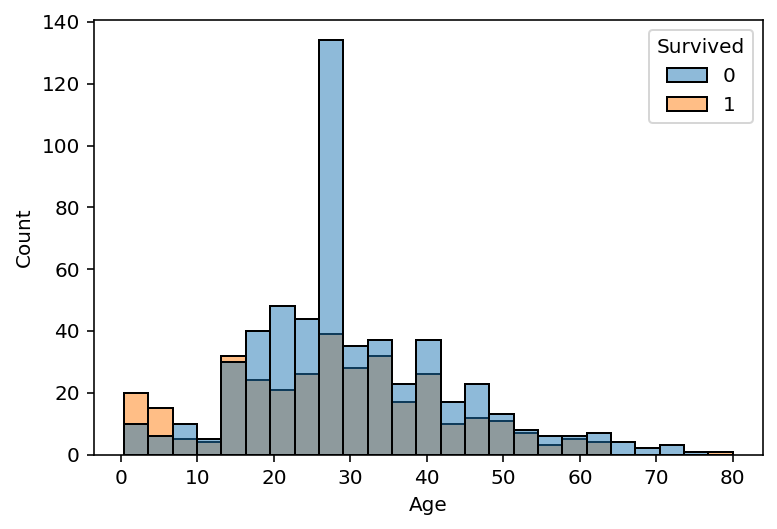

In [55]:
sns.histplot(titanic_train, x="Age", hue="Survived")


In [56]:
# Define the bin edges
bins = [0, 16, 30, 40, 55, np.inf]

# Define the labels for the bins
labels = ["Young", "YoungAdult", "Adults", "Old", "VeryOld"]

# Create the new column
titanic_train["Age"] = pd.cut(titanic_train["Age"], bins=bins, labels=labels)
titanic_test["Age"] = pd.cut(titanic_test["Age"], bins=bins, labels=labels)

#### FarePerPerson

<AxesSubplot:xlabel='FarePerPerson', ylabel='Count'>

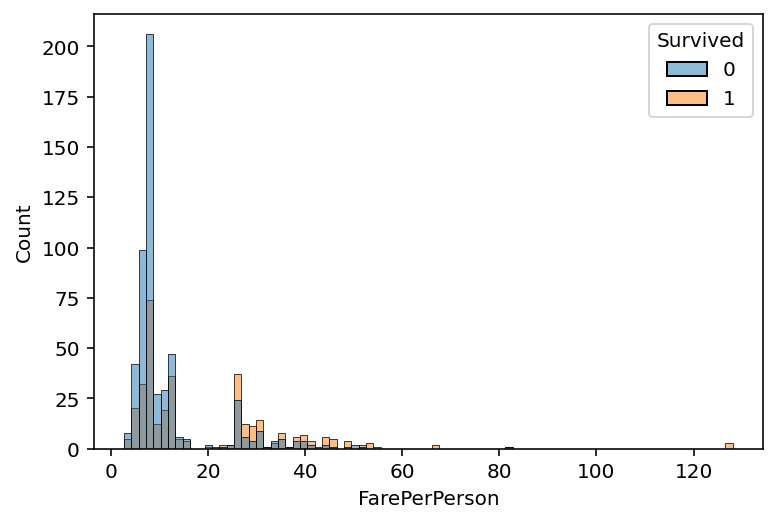

In [57]:
sns.histplot(titanic_train, x="FarePerPerson", hue="Survived")


In [58]:
# Define the bin edges
bins = [0, 10, 20, 40, np.inf]

# Define the labels for the bins
labels = ["LowFare", "MediumFare", "HighFare", "VeryHighFare"]

# Create the new column
titanic_train["FarePerPerson"] = pd.cut(titanic_train["FarePerPerson"], bins=bins, labels=labels)
titanic_test["FarePerPerson"] = pd.cut(titanic_test["FarePerPerson"], bins=bins, labels=labels)


In [59]:
titanic_train["FarePerPerson"]

0         LowFare
1        HighFare
2         LowFare
3        HighFare
4         LowFare
          ...    
886    MediumFare
887      HighFare
888       LowFare
889      HighFare
890       LowFare
Name: FarePerPerson, Length: 891, dtype: category
Categories (4, object): ['LowFare' < 'MediumFare' < 'HighFare' < 'VeryHighFare']

<AxesSubplot:xlabel='FarePerPerson', ylabel='Count'>

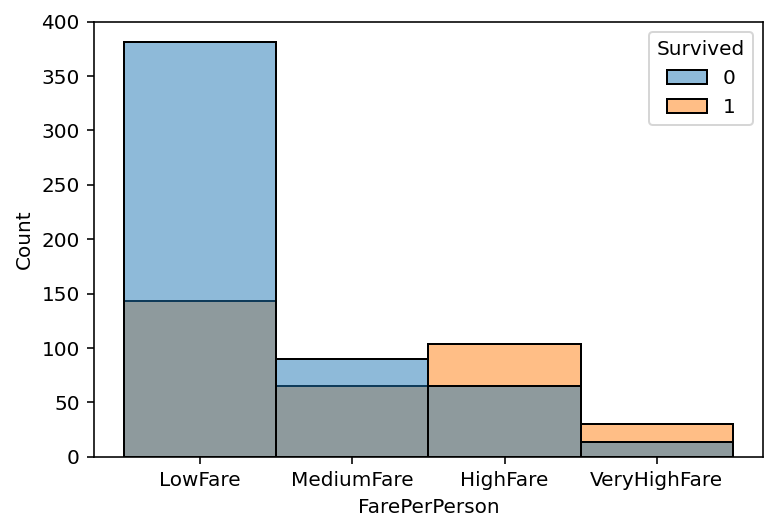

In [60]:
sns.histplot(titanic_train, x="FarePerPerson", hue="Survived")


#### FamilySize / PeopleInTicket

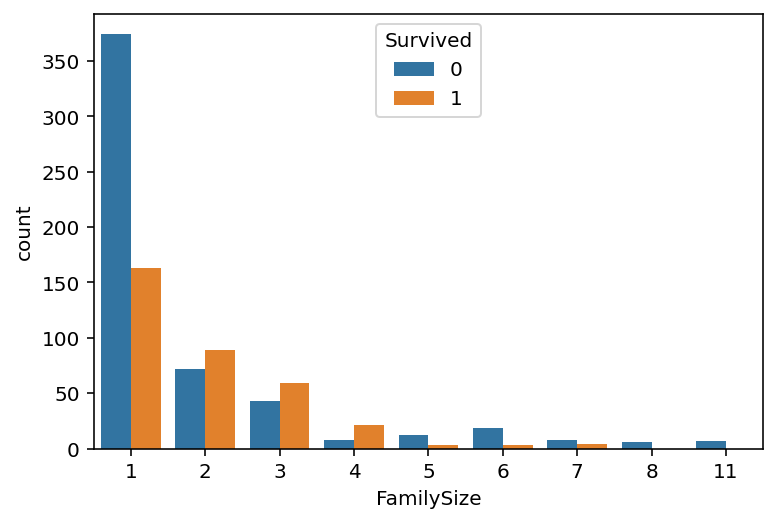

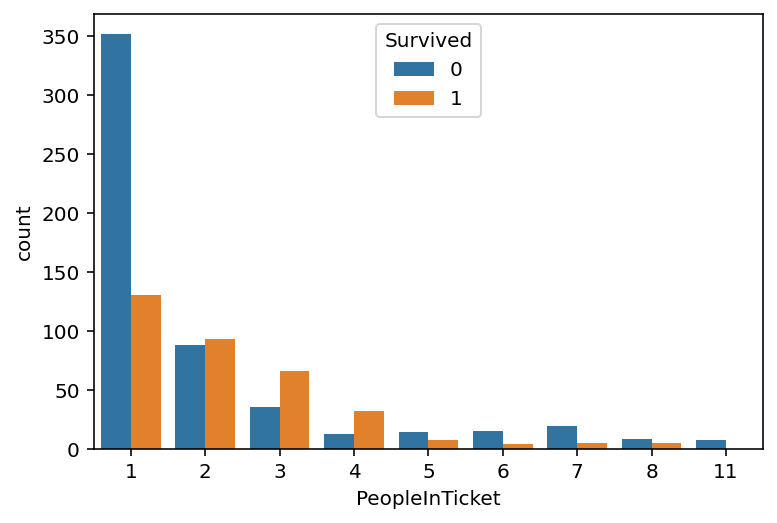

In [61]:
plt.figure()
sns.countplot(data=titanic_train, x="FamilySize", hue="Survived")
plt.show()

plt.figure()
sns.countplot(data=titanic_train, x="PeopleInTicket", hue="Survived")
plt.show()


We have very close Barplot. This is due because most people having the same ticket are people from the same family.
We clearly see that we can bin those values in 3 categories. 

In [62]:
# Define the bin edges
bins = [0, 1, 4, np.inf]

# Define the labels for the bins
labels = ["Solo", "SmallGroup", "LargeGroup"]

# Create the new column
titanic_train["FamilySize"] = pd.cut(titanic_train["FamilySize"], bins=bins, labels=labels)
titanic_test["FamilySize"] = pd.cut(titanic_test["FamilySize"], bins=bins, labels=labels)

titanic_train["PeopleInTicket"] = pd.cut(titanic_train["PeopleInTicket"], bins=bins, labels=labels)
titanic_test["PeopleInTicket"] = pd.cut(titanic_test["PeopleInTicket"], bins=bins, labels=labels)

<AxesSubplot:xlabel='PeopleInTicket', ylabel='Count'>

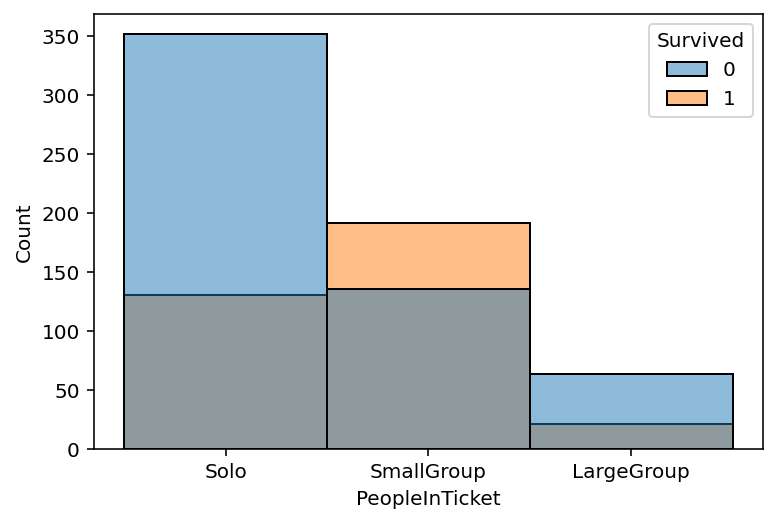

In [63]:
sns.histplot(titanic_train, x="PeopleInTicket", hue="Survived")


#### SibSp / ParCh

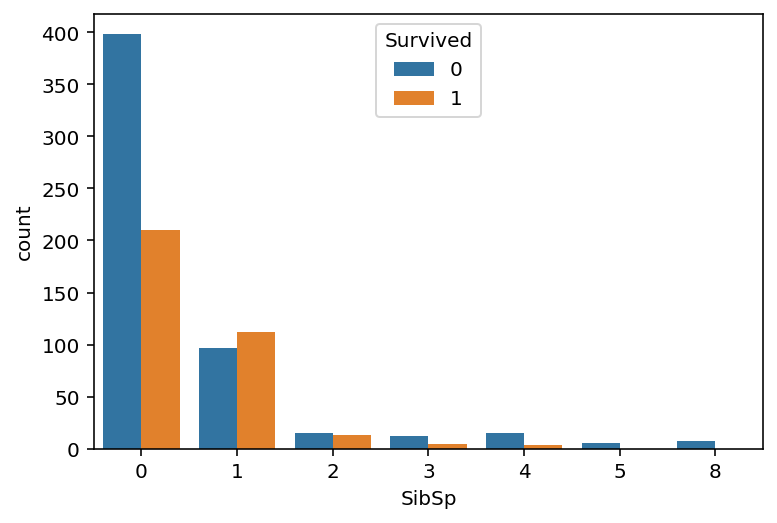

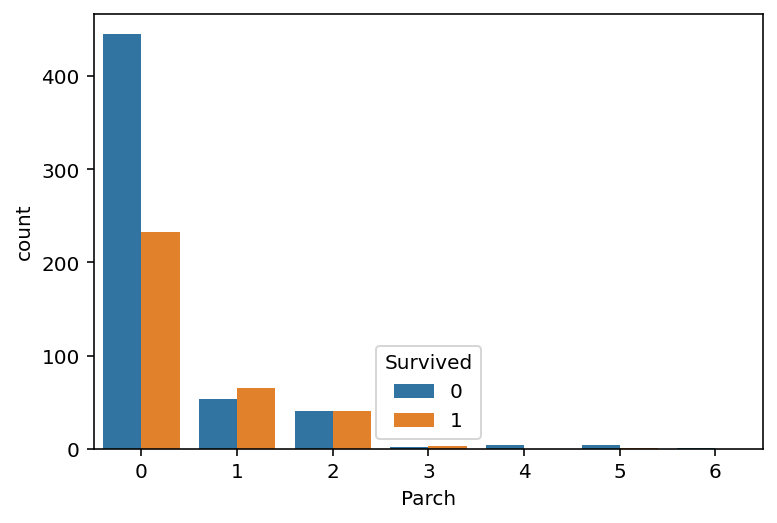

In [64]:
plt.figure()
sns.countplot(data=titanic_train, x="SibSp", hue="Survived")
plt.show()

plt.figure()
sns.countplot(data=titanic_train, x="Parch", hue="Survived")
plt.show()


In [65]:
# Define the bin edges
bins = [-np.inf, 0, 2, np.inf]

# Define the labels for the bins
labels = ["NoSibSP", "FewSibSP", "LotSibSP"]

# Create the new column
titanic_train["SibSp"] = pd.cut(titanic_train["SibSp"], bins=bins, labels=labels)
titanic_test["SibSp"] = pd.cut(titanic_test["SibSp"], bins=bins, labels=labels)

# Define the bin edges
bins = [-np.inf, 0, 3, np.inf]

# Define the labels for the bins
labels = ["NoParch", "FewParch", "LotParch"]

titanic_train["Parch"] = pd.cut(titanic_train["Parch"], bins=bins, labels=labels)
titanic_test["Parch"] = pd.cut(titanic_test["Parch"], bins=bins, labels=labels)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

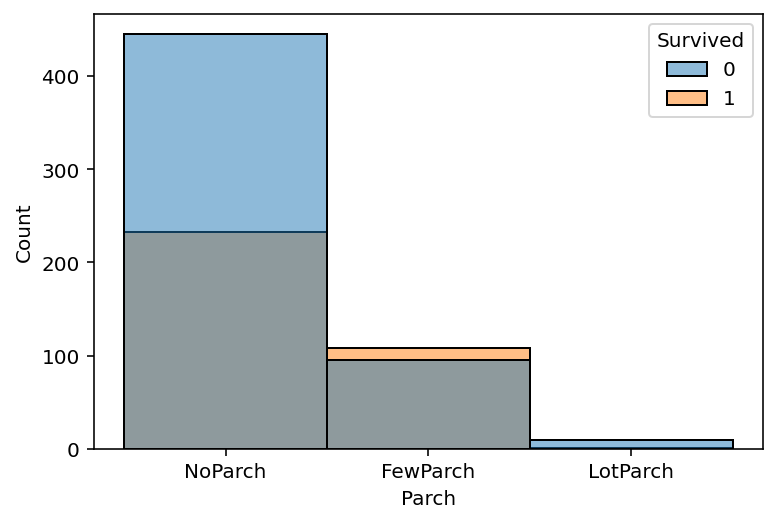

In [66]:
sns.histplot(titanic_train, x="Parch", hue="Survived")


### One-hot encoding


In [67]:
titanic_train["Sex"] = (titanic_train["Sex"] == "male").astype(int)
titanic_test["Sex"] = (titanic_test["Sex"] == "male").astype(int)

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Suppose 'column1' and 'column2' are your categorical columns
# Fit and transform the data, creating a new DataFrame

columns_to_ohe = ["Embarked", "Title"]
df_encoded = pd.DataFrame(enc.fit_transform(titanic_train[columns_to_ohe]))

# Give names to the new columns and concatenate with the original df
df_encoded.columns = enc.get_feature_names_out(columns_to_ohe)
titanic_train = pd.concat([titanic_train, df_encoded], axis=1).drop(columns_to_ohe, axis=1)

df_encoded = pd.DataFrame(enc.transform(titanic_test[columns_to_ohe]))
df_encoded.columns = enc.get_feature_names_out(columns_to_ohe)
titanic_test = pd.concat([titanic_test, df_encoded], axis=1).drop(columns_to_ohe, axis=1)


### Ordinal Encoding

In [69]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder
enc = OrdinalEncoder()

# Columns to apply the encoding
columns_to_encode = [
    "Pclass",
    "Age",
    "FamilySize",
    "PeopleInTicket",
    "SibSp",
    "Parch",
    "FarePerPerson",
]
# columns_to_encode = ["Pclass"]

df_encoded = titanic_train[columns_to_encode].copy()
df_encoded = enc.fit_transform(df_encoded)
df_encoded = pd.DataFrame(df_encoded, columns=columns_to_encode)
titanic_train = pd.concat([titanic_train.drop(columns_to_encode, axis=1), df_encoded], axis=1)

df_encoded = titanic_test[columns_to_encode].copy()
df_encoded = enc.transform(df_encoded)
df_encoded = pd.DataFrame(df_encoded, columns=columns_to_encode)
titanic_test = pd.concat([titanic_test.drop(columns_to_encode, axis=1), df_encoded], axis=1)

### Standard scaling

In [70]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# columns_to_scale = []
# titanic_train[columns_to_scale] = scaler.fit_transform(titanic_train[columns_to_scale])
# titanic_test[columns_to_scale] = scaler.transform(titanic_test[columns_to_scale])


In [71]:
print(titanic_train.isnull().sum())

Survived          0

Sex               0

Embarked_C        0

Embarked_Q        0

Embarked_S        0

Title_Master      0

Title_Miss        0

Title_Mr          0

Title_Mrs         0

Title_Officer     0

Title_Royal       0

Pclass            0

Age               0

FamilySize        0

PeopleInTicket    0

SibSp             0

Parch             0

FarePerPerson     0

dtype: int64


In [72]:
print(titanic_test.isnull().sum())

Sex               0

Embarked_C        0

Embarked_Q        0

Embarked_S        0

Title_Master      0

Title_Miss        0

Title_Mr          0

Title_Mrs         0

Title_Officer     0

Title_Royal       0

Pclass            0

Age               0

FamilySize        0

PeopleInTicket    0

SibSp             0

Parch             0

FarePerPerson     0

dtype: int64


In [73]:
titanic_train.dtypes


Survived            int64
Sex                 int64
Embarked_C        float64
Embarked_Q        float64
Embarked_S        float64
Title_Master      float64
Title_Miss        float64
Title_Mr          float64
Title_Mrs         float64
Title_Officer     float64
Title_Royal       float64
Pclass            float64
Age               float64
FamilySize        float64
PeopleInTicket    float64
SibSp             float64
Parch             float64
FarePerPerson     float64
dtype: object

### Final Selection



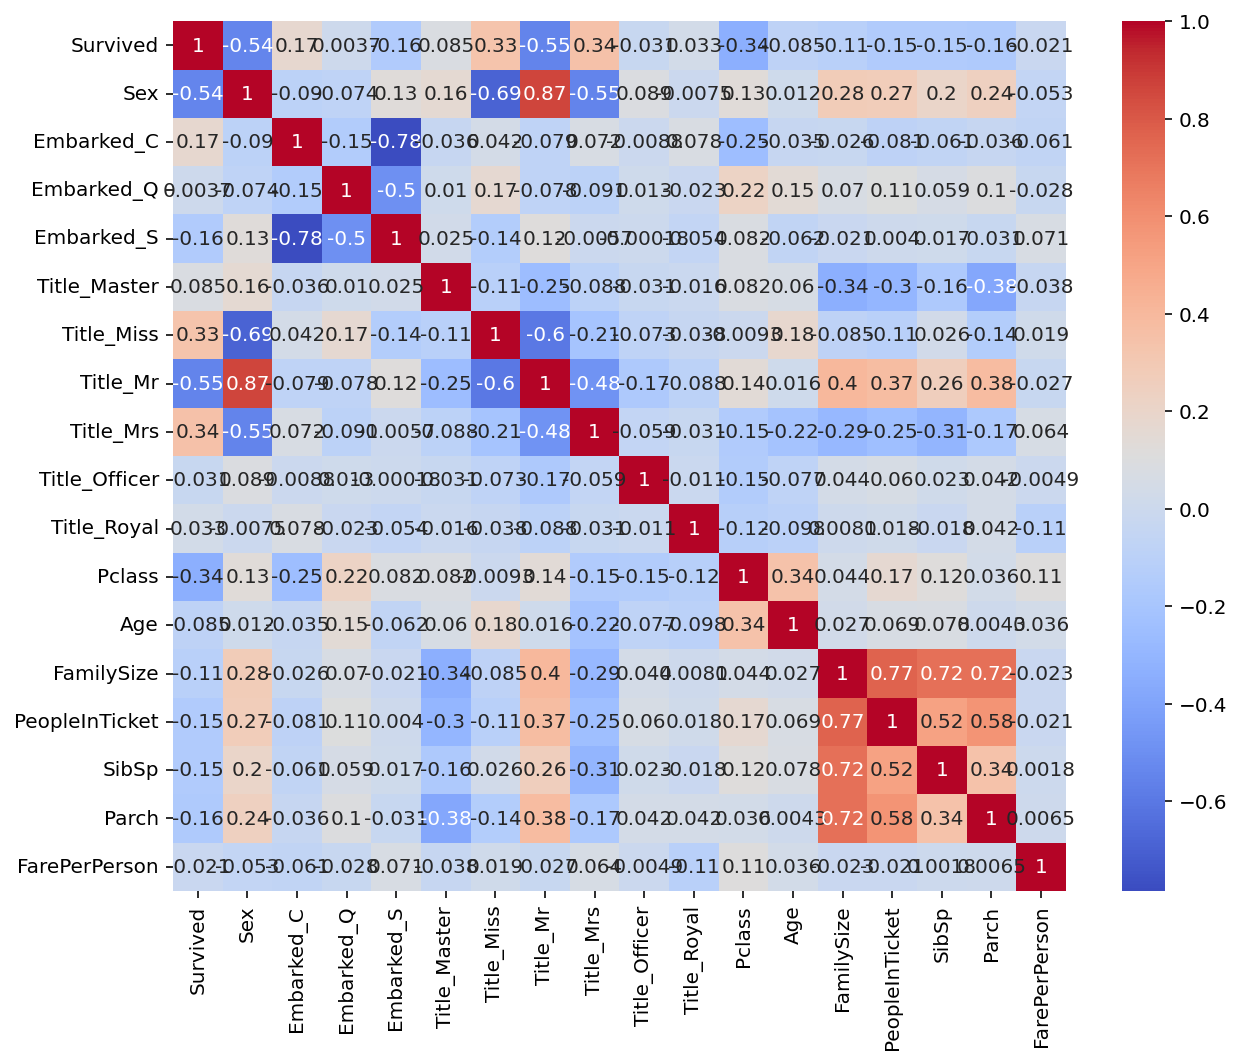

In [74]:
correlation_matrix = titanic_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate your data into X and y
X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

# apply SelectKBest class to extract the best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X, y)

# create a DataFrame to visualize the scores
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# concatenate dataframes for better visualization and sort values
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ["Feature", "Score"]
feature_scores_sorted = feature_scores.sort_values(by="Score", ascending=False)

print(feature_scores_sorted)


           Feature       Score

6         Title_Mr  112.805785

0              Sex   92.702447

7        Title_Mrs   90.900821

5       Title_Miss   78.302231

10          Pclass   54.465866

1       Embarked_C   22.009402

14           SibSp   11.040342

15           Parch   10.171092

11             Age    6.859206

4     Title_Master    6.180425

13  PeopleInTicket    6.178699

3       Embarked_S    5.984840

12      FamilySize    2.661521

9      Title_Royal    0.987834

8    Title_Officer    0.856126

16   FarePerPerson    0.193371

2       Embarked_Q    0.010847


In [76]:
titanic_train = titanic_train.loc[
    :,
    [
        "Survived",
        "Pclass",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Embarked_C",
        "Embarked_Q",
        "Embarked_S",
        "Title_Master",
        "Title_Miss",
        "Title_Mr",
        "Title_Mrs",
        "Title_Officer",
        "Title_Royal",
        "FamilySize",
        "PeopleInTicket",
        "FarePerPerson",
    ],
]

titanic_test = titanic_test.loc[
    :,
    [
        "Pclass",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Embarked_C",
        "Embarked_Q",
        "Embarked_S",
        "Title_Master",
        "Title_Miss",
        "Title_Mr",
        "Title_Mrs",
        "Title_Officer",
        "Title_Royal",
        "FamilySize",
        "PeopleInTicket",
        "FarePerPerson",
    ],
]


## Machine learning

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    # "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(eval_metric="logloss"),
}

In [78]:
# params = {
#     "LogisticRegression": {
#         "C": [0.1, 1.0, 10.0],
#         "solver": ["lbfgs", "liblinear"],
#         "max_iter": [5000],
#     },
#     "SVC": {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]},
#     "RandomForestClassifier": {"n_estimators": [10, 100, 1000], "max_depth": [None, 10, 20]},
#     "KNeighborsClassifier": {
#         "n_neighbors": range(1, 21),
#         "p": [1, 2],
#     },
#     "DecisionTreeClassifier": {
#         "max_depth": [None, 10, 20, 30, 40],
#         "min_samples_split": [2, 10, 20],
#     },
#     "GradientBoostingClassifier": {
#         "learning_rate": [0.01, 0.1, 1.0],
#         "n_estimators": [100, 500, 1000],
#     },
#     "XGBClassifier": {"learning_rate": [0.01, 0.1, 1.0], "n_estimators": [100, 500, 1000]},
# }

In [79]:
params = {
    "LogisticRegression": {
        "C": [0.1],
        "solver": ["lbfgs", "liblinear"],
        "max_iter": [5000],
    },
    "SVC": {
        "C": [0.4],
        "kernel": ["rbf"],
        "gamma": ["scale"],
    },
    "RandomForestClassifier": {
        "n_estimators": [1000],
        "max_depth": [5],
        "max_features": ["sqrt"],
    },
    "KNeighborsClassifier": {
        "n_neighbors": range(1, 41),
        "p": [2],
    },
    "GradientBoostingClassifier": {
        "learning_rate": [0.01],
        "n_estimators": [350],
        "max_depth": [5],
        "subsample": [0.8],
    },
    "XGBClassifier": {
        "learning_rate": [0.007],
        "n_estimators": [300],
        "max_depth": [7],
        "subsample": [0.5],
    },
}

In [80]:
X_train = titanic_train.drop("Survived", axis=1)
y_train = titanic_train["Survived"]


In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score

model_score = {}
folds = 10

for classifier_name in classifiers.keys():
    clf = classifiers[classifier_name]
    param_grid = params[classifier_name]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=folds)  # 5-fold cross-validation
    grid_search.fit(X_train, y_train)

    # Calculate additional scores
    f1_score = cross_val_score(
        grid_search.best_estimator_, X_train, y_train, cv=folds, scoring="f1"
    ).mean()
    auc_score = cross_val_score(
        grid_search.best_estimator_, X_train, y_train, cv=folds, scoring="roc_auc"
    ).mean()

    model_score[classifier_name] = {
        "Best Score": grid_search.best_score_,
        "F1 Score": f1_score,
        "AUC": auc_score,
    }
    print(classifier_name)
    print(f"Best parameters : {grid_search.best_params_}")
    print(f"Best score : {grid_search.best_score_}")
    print(f"F1 score : {f1_score}")
    print(f"AUC : {auc_score}")
    print()


LogisticRegression

Best parameters : {'C': 0.1, 'max_iter': 5000, 'solver': 'liblinear'}

Best score : 0.8226716604244693

F1 score : 0.7537653946517837

AUC : 0.8604017202840731



SVC

Best parameters : {'C': 0.4, 'gamma': 'scale', 'kernel': 'rbf'}

Best score : 0.8350062421972535

F1 score : 0.7704731490661492

AUC : 0.8599705740882213



RandomForestClassifier

Best parameters : {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}

Best score : 0.8316604244694134

F1 score : 0.7668185307978753

AUC : 0.8759977930566165



KNeighborsClassifier

Best parameters : {'n_neighbors': 10, 'p': 2}

Best score : 0.806991260923845

F1 score : 0.71828451841006

AUC : 0.859909487027134



GradientBoostingClassifier

Best parameters : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 350, 'subsample': 0.8}

Best score : 0.8361423220973784

F1 score : 0.7684382546878996

AUC : 0.8757486348074585



XGBClassifier

Best parameters : {'learning_rate': 0.007, 'max_depth': 7, 'n_estim

In [82]:
# Convert nested dictionary into flat dictionary
flat_data = []
for model, scores in model_score.items():
    flat_scores = {"Model": model, **scores}
    flat_data.append(flat_scores)

# Create dataframe from flat dictionary
df_model_score = pd.DataFrame(flat_data)

# Sort by Score
df_model_score.sort_values(by="Best Score", ascending=False)

,Model,Best Score,F1 Score,AUC
4,GradientBoostingClassifier,0.836142,0.768438,0.875749
5,XGBClassifier,0.836142,0.766468,0.877998
1,SVC,0.835006,0.770473,0.859971
2,RandomForestClassifier,0.831660,0.766819,0.875998
0,LogisticRegression,0.822672,0.753765,0.860402
3,KNeighborsClassifier,0.806991,0.718285,0.859909


## Prediction

In [83]:
# Suppose your best model was logistic regression
best_model = grid_search.best_estimator_
X_test = titanic_test

# Make predictions
predictions = best_model.predict(X_test)

# Assuming that the test DataFrame is ordered correctly
titanic_test["PassengerId"] = range(892, 892 + len(titanic_test))

# Create a DataFrame with the passenger ids and the corresponding predictions
submission = pd.DataFrame({"PassengerId": titanic_test["PassengerId"], "Survived": predictions})

# Save the DataFrame to a CSV file
submission.to_csv("submission.csv", index=False)

In [84]:
# !kaggle competitions submit -f submission.csv -m ""


In [85]:
# !kaggle competitions submissions titanic


In [86]:
df_leaderboard = pd.read_csv("leaderboard.csv")
df_leaderboard.head()


,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
0,1,9905796,Sujith K Mandala,2023-05-24 12:10:51,1.0,3,sujithmandala
1,2,10401971,Devesh Kumar Shaw,2023-05-24 18:34:07,1.0,3,deveshkumarshaw
2,3,4759432,Gaurav #10,2023-06-22 20:23:45,1.0,3,scipygaurav
3,4,6270770,lupusinitium,2023-05-25 02:04:34,1.0,1,lupusinitium
4,5,10442920,What Party,2023-05-25 05:42:51,1.0,2,whatparty


In [87]:
df_myscore = pd.DataFrame({"ScoreId": [0, 1], "Score": [0.75358, 0.7703]})
df_myscore.head()

,ScoreId,Score
0,0,0.75358
1,1,0.77030


(0.7, 0.85)

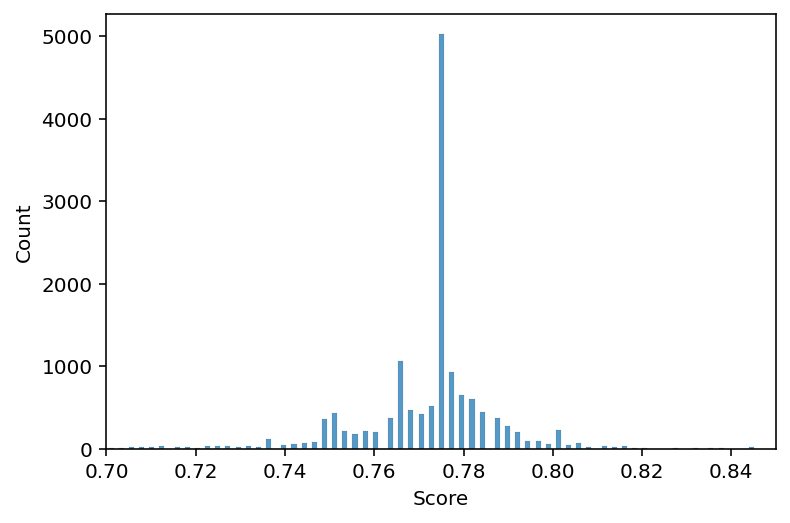

In [88]:
plt.figure()
sns.histplot(df_leaderboard, x="Score")
plt.xlim([0.7, 0.85])

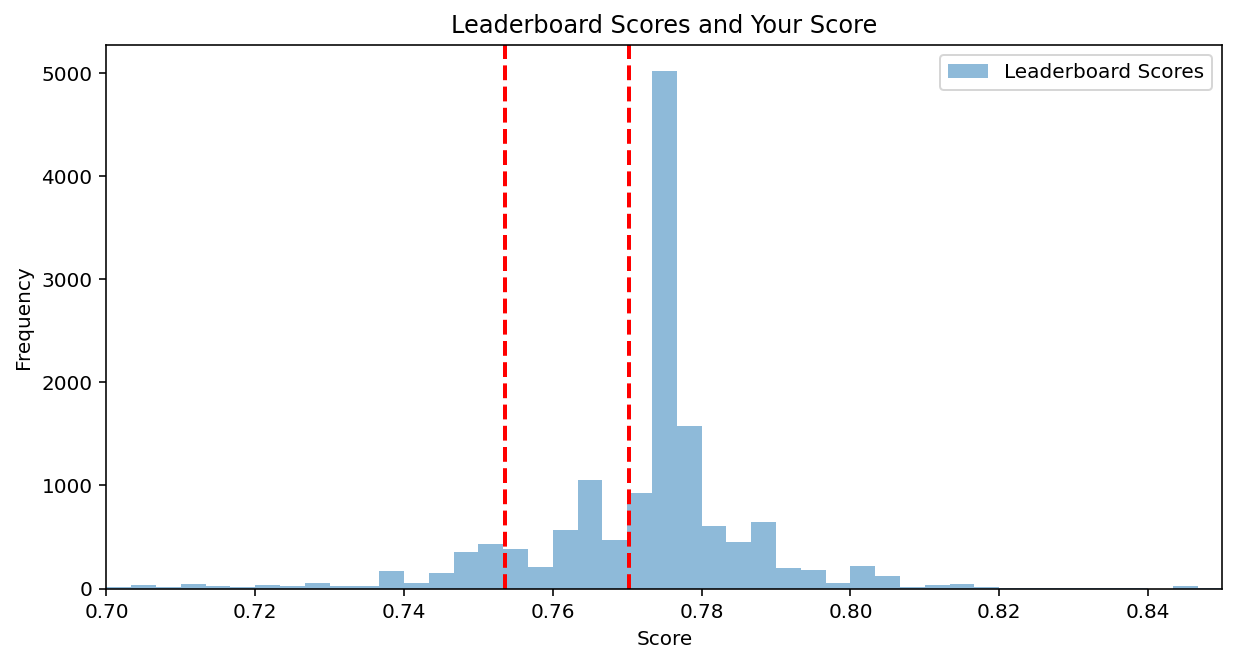

In [89]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 5))
plt.hist(df_leaderboard["Score"], bins=300, alpha=0.5, label="Leaderboard Scores")
for index, row in df_myscore.iterrows():
    plt.axvline(row["Score"], color="r", linestyle="dashed", linewidth=2)


red_patch = mpatches.Patch(color="red", label="Your Scores")
plt.legend(handles=[red_patch])
plt.xlim([0.7, 0.85])
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Leaderboard Scores and Your Score")
plt.show()
